#  Imports 

- **pandas (`pd`)**: For data manipulation and analysis using DataFrames.  
- **numpy (`np`)**: For numerical operations and efficient array computations.  
- **matplotlib.pyplot (`plt`)**: For creating visualizations like line plots, histograms, and scatter plots.  
- **MinMaxScaler**: Scales features to a specific range (usually 0–1), important for neural network training.  
- **tensorflow (`tf`)**: Core deep learning library for building and training neural networks.  
- **Sequential**: Keras model type for stacking layers sequentially.  
- **LSTM**: Recurrent layer for learning long-term dependencies in time series data.  
- **GRU**: Simpler recurrent layer for sequential data, similar to LSTM but faster.  
- **Dense**: Fully connected layer used in intermediate or output layers.  
- **Input**: Explicitly defines input shape for the model.  
- **Conv1D**: One-dimensional convolution layer for feature extraction in time series.  
- **Flatten**: Converts multi-dimensional inputs to a single dimension for Dense layers.  
- **Dropout**: Regularization technique to prevent overfitting by randomly dropping neurons during training.  
- **EarlyStopping**: Stops training if model performance on validation data stops improving.  
- **ReduceLROnPlateau**: Reduces learning rate when performance plateaus to improve convergence.  
- **Adam**: Optimizer that efficiently updates network weights during training.  
- **mean_squared_error (MSE)**: Evaluates average squared differences between predicted and actual values.  
- **mean_absolute_error (MAE)**: Evaluates average absolute differences between predicted and actual values.  
- **r2_score**: Measures how well predictions explain variance in the actual data.


In [78]:
# All the imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input, Conv1D, Flatten, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

#  Step 1: Load the Dataset

- Load `AirQuality.csv` into a DataFrame (`df`).  
- `df.head(20)` shows the first 20 rows to inspect data and columns.  
- Helps verify the dataset is loaded correctly.


In [79]:
# -----------------------------
# STEP 1: Load the dataset
# -----------------------------
df = pd.read_csv('AirQuality.csv')
df.head(20)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
5,3/10/2004,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848
6,3/11/2004,0:00:00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603
7,3/11/2004,1:00:00,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702
8,3/11/2004,2:00:00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648
9,3/11/2004,3:00:00,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517


## Exploratory Data Analysis(EDA)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [81]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object

In [82]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [83]:
df.shape

(9357, 15)

In [84]:
df.nunique()

Date              391
Time               24
CO(GT)             97
PT08.S1(CO)      1042
NMHC(GT)          430
C6H6(GT)          408
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           284
PT08.S4(NO2)     1604
PT08.S5(O3)      1744
T                 437
RH                754
AH               6684
dtype: int64

In [85]:
df.duplicated().sum()

np.int64(0)

In [86]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


#  Step 2: Create DateTime Index

- Combine `Date` and `Time` columns into a single `DateTime` column using `pd.to_datetime`.  
- Set `DateTime` as the DataFrame index with `set_index` for easier time series analysis.  
- This allows indexing, slicing, and resampling based on time.  
- `df` now has a DateTime index ready for time-based operations.


In [87]:
# -----------------------------
# STEP 2: Create DateTime index
# -----------------------------
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10 19:00:00,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10 20:00:00,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10 21:00:00,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10 22:00:00,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
2005-04-04 11:00:00,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
2005-04-04 12:00:00,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406


# Visualization 

## Time Series Plot of CO Levels

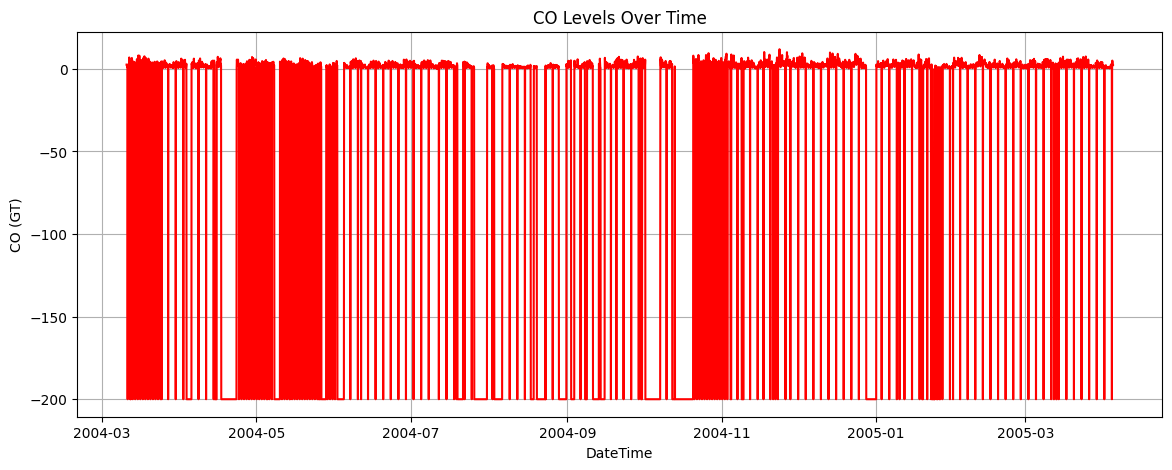

In [88]:
# Combine Date + Time to datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Plot CO over time
plt.figure(figsize=(14,5))
plt.plot(df['DateTime'], df['CO(GT)'], color='red')
plt.title('CO Levels Over Time')
plt.xlabel('DateTime')
plt.ylabel('CO (GT)')
plt.grid(True)
plt.show()


## Correlation Heatmap

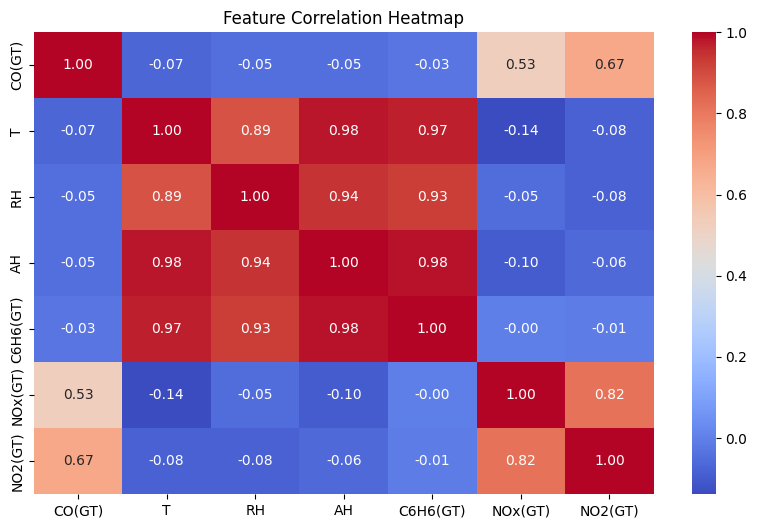

In [89]:
import seaborn as sns

# Select numeric columns for correlation
numeric_cols = ['CO(GT)', 'T', 'RH', 'AH', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [90]:
df[numeric_cols].corr()

,CO(GT),T,RH,AH,C6H6(GT),NOx(GT),NO2(GT)
CO(GT),1.000000,-0.068939,-0.048227,-0.045892,-0.031378,0.526451,0.671127
T,-0.068939,1.000000,0.885911,0.981001,0.971375,-0.138452,-0.084104
RH,-0.048227,0.885911,1.000000,0.943995,0.925062,-0.053009,-0.081305
AH,-0.045892,0.981001,0.943995,1.000000,0.984555,-0.095847,-0.060440
C6H6(GT),-0.031378,0.971375,0.925062,0.984555,1.000000,-0.001174,-0.010992
NOx(GT),0.526451,-0.138452,-0.053009,-0.095847,-0.001174,1.000000,0.817139
NO2(GT),0.671127,-0.084104,-0.081305,-0.060440,-0.010992,0.817139,1.000000


## Histogram / Distribution of CO Levels

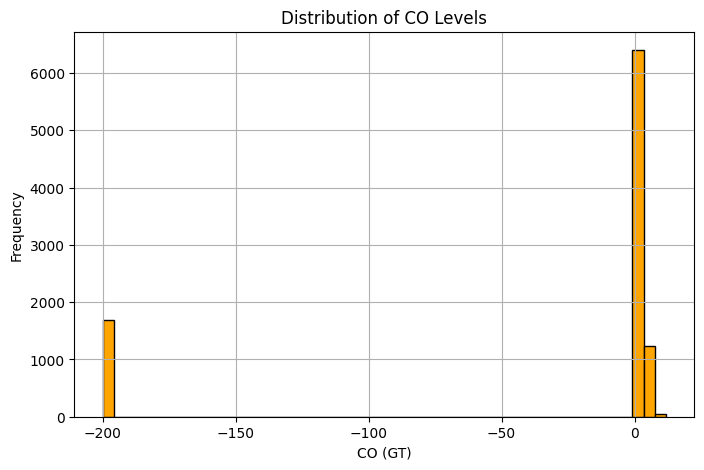

In [91]:
plt.figure(figsize=(8,5))
plt.hist(df['CO(GT)'], bins=50, color='orange', edgecolor='black')
plt.title('Distribution of CO Levels')
plt.xlabel('CO (GT)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#  Step 3: Keep Only CO(GT)

- Select only the `CO(GT)` column from the dataset, as it is the target for analysis.  
- Store it in a new DataFrame `co_data`.  
- Simplifies the dataset by focusing only on the relevant feature for modeling.  
- `co_data` now contains only the CO measurements.


In [92]:
# -----------------------------
# STEP 3: Keep only CO(GT)
# -----------------------------
co_data = df[['CO(GT)']]
co_data

,CO(GT)
DateTime,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2
2004-03-10 21:00:00,2.2
2004-03-10 22:00:00,1.6
...,...
2005-04-04 10:00:00,3.1
2005-04-04 11:00:00,2.4
2005-04-04 12:00:00,2.4


#  Step 4: Handle Missing Values

- Sensor missing values are indicated by `-200` in the dataset.  
- Replace all `-200` values with `NaN` using `replace(-200, np.nan)`.  
- This marks missing data properly so it can be handled later (e.g., interpolation or averaging).  
- `co_data` now has `NaN` in place of invalid sensor readings.


In [93]:
# Replace -200 (sensor missing values) with NaN
co_data = co_data.replace(-200, np.nan)
co_data

,CO(GT)
DateTime,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2
2004-03-10 21:00:00,2.2
2004-03-10 22:00:00,1.6
...,...
2005-04-04 10:00:00,3.1
2005-04-04 11:00:00,2.4
2005-04-04 12:00:00,2.4


#  Step 5: Convert Hourly Data → 3-Hour Average

- Resample the time series from hourly to 3-hour intervals using `resample('3h')`.  
- Compute the **mean** for each 3-hour block to smooth data and reduce noise.  
- This also helps handle missing values by averaging over multiple hours.  
- `co_3h` now contains CO values averaged every 3 hours.


In [94]:
# -----------------------------
# STEP 5: Convert hourly → 3-hour average
# -----------------------------
co_3h = co_data.resample('3h').mean()
co_3h

,CO(GT)
DateTime,
2004-03-10 18:00:00,2.266667
2004-03-10 21:00:00,1.666667
2004-03-11 00:00:00,1.033333
2004-03-11 03:00:00,0.650000
2004-03-11 06:00:00,1.266667
...,...
2005-04-04 00:00:00,0.666667
2005-04-04 03:00:00,0.450000
2005-04-04 06:00:00,3.366667


#  Step 6: Fill Missing Values

- Use **interpolation** to fill `NaN` values in the 3-hour averaged data.  
- `interpolate()` estimates missing values based on surrounding data points.  
- Ensures a complete time series without gaps, ready for modeling.  
- `co_3h` now has no missing values.


In [95]:
# -----------------------------
# STEP 6: Fill missing values
# -----------------------------
co_3h = co_3h.interpolate()
co_3h

,CO(GT)
DateTime,
2004-03-10 18:00:00,2.266667
2004-03-10 21:00:00,1.666667
2004-03-11 00:00:00,1.033333
2004-03-11 03:00:00,0.650000
2004-03-11 06:00:00,1.266667
...,...
2005-04-04 00:00:00,0.666667
2005-04-04 03:00:00,0.450000
2005-04-04 06:00:00,3.366667


# Step 7: Normalize Data (0–1)

- Apply **Min-Max scaling** to transform CO values into the range **0 to 1**.  
- `MinMaxScaler()` scales data based on the formula:  
  \[
  X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
  \]  
- Normalization improves neural network training stability and convergence.  
- `co_scaled` now contains normalized CO values ready for modeling.


In [96]:
# -----------------------------
# STEP 7: Normalize (0–1)
# -----------------------------
scaler = MinMaxScaler()
co_scaled = scaler.fit_transform(co_3h)
co_scaled

array([[0.1951952 ],
       [0.14114114],
       [0.08408408],
       ...,
       [0.29429429],
       [0.27327327],
       [0.19219219]], shape=(3119, 1))

#  Step 8: Create Sequences & Train-Test Split

- **Create sequences for time series prediction**:
  - Define a function `make_dataset(data, steps)` to create input (`X`) and target (`y`) pairs.
  - Each `X` contains `steps` past values, and `y` is the next value to predict.
  - Example: `n_steps = 8` → using past 24 hours (8 × 3-hour averages) to predict the next CO value.
  
- **Train-test split**:
  - Split data into **80% training** and **20% testing**.
  - `X_train`, `y_train` → used to train the model.
  - `X_test`, `y_test` → used to evaluate the model.

- `X_train.shape` confirms the shape of training input sequences.


In [97]:
# -----------------------------
# STEP 8: Create sequences
# -----------------------------
def make_dataset(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:i+steps])
        y.append(data[i+steps])
    return np.array(X), np.array(y)
    
# Past 24 hours → predict next value
n_steps = 8   # 8 × 3 hours = 24 hours
X, y = make_dataset(co_scaled, n_steps)

# -----------------------------
# STEP 8: Train–test split
# -----------------------------
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Training input shape:", X_train.shape)

Training input shape: (2488, 8, 1)


# LSTM Model

## Build and Train LSTM Model

- **Model Architecture**:
  - `Sequential()` model with layers stacked sequentially.
  - **LSTM layer**: 32 units, takes input shape `(n_steps, 1)` for past 24-hour sequences.
  - **Dense layer**: 1 unit to predict the next CO value.

- **Compile Model**:
  - Optimizer: `adam` (adaptive learning rate for efficient training).
  - Loss: `mse` (mean squared error) to measure prediction error.

- **Model Summary**:
  - `lstm_base.summary()` shows the number of parameters and layer details.

- **Train Model**:
  - `fit()` trains the model on `X_train` and `y_train`.
  - Epochs: 20, Batch size: 32.
  - Validation split: 10% of training data used for validation.
  - `verbose=1` displays training progress.

- **Purpose**:
  - Learn patterns in CO time series to predict future values.


In [98]:

lstm_base = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

lstm_base.compile(
    optimizer='adam',
    loss='mse'
)

lstm_base.summary()
lstm_base.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0180 - val_loss: 0.0132
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0109 - val_loss: 0.0122
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0103 - val_loss: 0.0120
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0100 - val_loss: 0.0116
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - val_loss: 0.0112
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - val_loss: 0.0105
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0087 - val_loss: 0.0094
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0080 - val_loss: 0.0086
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - val_loss: 0.0085
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0070 - val_loss: 0.0082
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0068 - val_loss: 0.0080
Epoch 12/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - val_

# GRU 

## Build and Train GRU Model

- **Model Architecture**:
  - `Sequential()` model with a **GRU layer** of 32 units.
  - Input shape `(n_steps, 1)` matches the LSTM input (past 24-hour sequences).
  - **Dense layer** with 1 unit outputs the predicted CO value.

- **Compile Model**:
  - Optimizer: `adam` for efficient weight updates.
  - Loss: `mse` to measure prediction error.

- **Train Model**:
  - `fit()` trains on `X_train` and `y_train`.
  - Epochs: 20, Batch size: 32.
  - Validation split: 10% to monitor performance during training.

- **Purpose**:
  - GRU is a simpler recurrent network compared to LSTM, often faster while capturing time dependencies in CO levels.


In [99]:
gru_base = Sequential([
    GRU(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

gru_base.compile(
    optimizer='adam',
    loss='mse'
)

gru_base.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0158 - val_loss: 0.0125
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0106 - val_loss: 0.0109
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0097 - val_loss: 0.0099
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0072 - val_loss: 0.0074
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - val_loss: 0.0072
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0070 - val_loss: 0.0072
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0069 - val_loss: 0.0071
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - val_loss: 0.0071
Epoch 12/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - v

# TCN

## Build and Train TCN (1D Convolution) Model

- **Model Architecture**:
  - `Sequential()` model with an explicit **Input layer** matching `(n_steps, 1)`.
  - **Conv1D layer**: 32 filters, kernel size 3, `relu` activation to extract temporal patterns.
  - **Flatten layer**: Converts 3D output of Conv1D into 1D for Dense layer.
  - **Dense layer**: 1 unit to predict the next CO value.

- **Compile Model**:
  - Optimizer: `adam`.
  - Loss: `mse` (mean squared error).

- **Train Model**:
  - `fit()` trains on `X_train` and `y_train`.
  - Epochs: 20, Batch size: 32.
  - Validation split: 10% for monitoring performance.

- **Purpose**:
  - TCN uses convolution to capture temporal dependencies instead of recurrent layers, providing an alternative to LSTM/GRU for time series prediction.


In [100]:
tcn_base = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Proper Input layer
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(1)
])

tcn_base.compile(
    optimizer='adam',
    loss='mse'
)

tcn_base.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0172 - val_loss: 0.0121
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - val_loss: 0.0078
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0061 - val_loss: 0.0074
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0059 - val_loss: 0.0071
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0057 - val_loss: 0.0069
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - val_loss: 0.0067
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - val_loss: 0.0065
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0054 - val_loss: 0.0064
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0053 - val_loss: 0.0063
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052 - val_loss: 0.0062
Epoch 12/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052 - val_lo

## Evaluate Models

- **Purpose**: Assess the performance of each trained model (LSTM, GRU, TCN) on the test set.

- **Steps in `evaluate(model, name)` function**:
  1. **Predict** on `X_test` using `model.predict()`.
  2. **Inverse transform** both predictions and true values to original CO scale using `scaler.inverse_transform()`.
  3. **Compute evaluation metrics**:
     - **RMSE** (Root Mean Squared Error): Measures the average prediction error in original units.
     - **MAE** (Mean Absolute Error): Measures the average absolute difference between predicted and actual values.
     - **R² score**: Indicates how well predictions explain the variance in actual CO values (1 = perfect, 0 = no correlation).
  4. **Print metrics** for each model with a descriptive name.

- **Run Evaluation**:
  - `evaluate(lstm_base, "Baseline LSTM")` → Evaluates LSTM model.
  - `evaluate(gru_base, "Baseline GRU")` → Evaluates GRU model.
  - `evaluate(tcn_base, "Baseline TCN")` → Evaluates TCN model.

- **Outcome**: Provides quantitative comparison of model performance on CO prediction.


In [101]:
def evaluate(model, name):
    y_pred = model.predict(X_test, verbose=0)

    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    r2 = r2_score(y_test_inv, y_pred_inv)

    print(f"\n{name}")
    print("RMSE:", rmse)
    print("MAE :", mae)
    print("R²  :", r2)
    return (rmse, mae, r2)
    

evaluate(lstm_base, "Baseline LSTM")
evaluate(gru_base, "Baseline GRU")
evaluate(tcn_base, "Baseline TCN")
 


Baseline LSTM
RMSE: 0.9387859611266266
MAE : 0.6477207738649022
R²  : 0.4476868124692498

Baseline GRU
RMSE: 0.9361066341943074
MAE : 0.666865502641506
R²  : 0.4508349546881789

Baseline TCN
RMSE: 0.8257247849107958
MAE : 0.6113071886019654
R²  : 0.5727098502267154


(np.float64(0.8257247849107958), 0.6113071886019654, 0.5727098502267154)


Baseline LSTM
RMSE: 0.9387859611266266
MAE : 0.6477207738649022
R²  : 0.4476868124692498

Baseline GRU
RMSE: 0.9361066341943074
MAE : 0.666865502641506
R²  : 0.4508349546881789

Baseline TCN
RMSE: 0.8257247849107958
MAE : 0.6113071886019654
R²  : 0.5727098502267154


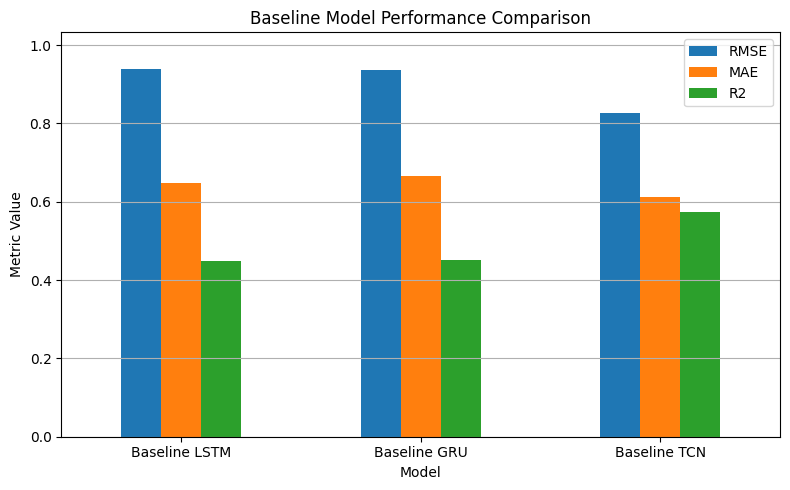

In [102]:
# Create DataFrame for evaluation metrics
results_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'R2'])

# Evaluate models and store metrics
results_df.loc[len(results_df)] = ('Baseline LSTM', *evaluate(lstm_base, "Baseline LSTM"))
results_df.loc[len(results_df)] = ('Baseline GRU',  *evaluate(gru_base, "Baseline GRU"))
results_df.loc[len(results_df)] = ('Baseline TCN',  *evaluate(tcn_base, "Baseline TCN"))

# Set 'Model' as index for plotting
results_df.set_index('Model', inplace=True)

# Plot grouped bar chart
results_df.plot(kind='bar', figsize=(8,5))
plt.title("Baseline Model Performance Comparison")
plt.ylabel("Metric Value")
plt.ylim(0, max(results_df.max())*1.1)  # add some space above bars
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Model Improvement for GRU

## GRU Model with Longer History (n_steps = 24)

- **Objective**: Use past **72 hours** (24 × 3-hour averages) to predict the next CO value, providing more historical context for the GRU model.

- **Create sequences**:
  - `make_dataset(co_scaled, n_steps)` generates input-output pairs with `n_steps = 24`.
  - `X_gru` → past 72 hours sequences, `y_gru` → next CO value.

- **Train-test split** (chronological):
  - 80% training, 20% testing to preserve time order.

- **Train-validation split** (chronological):
  - 10% of training data used as validation set.
  - Ensures model is evaluated on unseen data during training.

- **Output shapes**:
  - `X_train`, `y_train` → training set.
  - `X_val`, `y_val` → validation set.
  - `X_test`, `y_test` → test set.

- **Purpose**:
  - Longer history may improve prediction accuracy by capturing longer temporal dependencies.


In [103]:
# -----------------------------
# GRU Model for n_steps = 24
# -----------------------------
n_steps = 24  # 24 × 3h = 72 hours of history
X_gru, y_gru = make_dataset(co_scaled, n_steps)

# Train-test split (chronological)
split = int(0.8 * len(X_gru))
X_train, X_test = X_gru[:split], X_gru[split:]
y_train, y_test = y_gru[:split], y_gru[split:]

# Further split train into train + validation (chronological)
val_size = int(0.1 * len(X_train))
X_val, y_val = X_train[-val_size:], y_train[-val_size:]
X_train, y_train = X_train[:-val_size], y_train[:-val_size]

print("GRU Training shape:", X_train.shape)
print("GRU Validation shape:", X_val.shape)
print("GRU Test shape:", X_test.shape)



GRU Training shape: (2229, 24, 1)
GRU Validation shape: (247, 24, 1)
GRU Test shape: (619, 24, 1)


## Callbacks for GRU Training

- **Purpose**: Improve training efficiency and prevent overfitting using callbacks.

- **EarlyStopping**:
  - `monitor='val_loss'`: Tracks validation loss to decide when to stop training.
  - `patience=20`: Allows the model 20 epochs to improve before stopping (prevents premature stopping due to small fluctuations).
  - `restore_best_weights=True`: Ensures the model keeps the weights from the epoch with the lowest validation loss.

- **ReduceLROnPlateau**:
  - `monitor='val_loss'`: Adjusts learning rate based on validation loss.
  - `factor=0.5`: Reduces learning rate by half when no improvement is seen.
  - `patience=5`: Waits 5 epochs before reducing the learning rate.
  - `min_lr=1e-5`: Learning rate will not go below this threshold.
  - `verbose=1`: Prints messages when learning rate is reduced.

- **Outcome**: These callbacks help the GRU model converge faster, avoid overfitting, and recover from plateaus during training.


In [104]:
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=20,               # Give it more room to "hiccup" and recover
    restore_best_weights=True  # This is your insurance policy
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-5,
    verbose=1
)

## Build and Train Enhanced GRU Model

- **Model Architecture**:
  - `Input layer` with shape `(n_steps, 1)` to accept sequences of past 72 hours.
  - **GRU(256, return_sequences=True)**: First GRU layer with 256 units, returns full sequences for next GRU layer.
  - **Dropout(0.2)**: Prevents overfitting by randomly dropping 20% of neurons during training.
  - **GRU(128)**: Second GRU layer with 128 units to capture temporal patterns.
  - **Dense(1)**: Output layer predicts next CO value.

- **Compile Model**:
  - Optimizer: Adam with learning rate 0.0005 for stable training.
  - Loss: Mean Squared Error (MSE) for regression.

- **Train Model**:
  - `fit()` trains the model using `X_train` and `y_train`.
  - Validation: `X_val`, `y_val` for monitoring performance.
  - Epochs: 150, Batch size: 16.
  - Callbacks: `early_stop` (stop if validation loss doesn't improve) and `reduce_lr` (reduce learning rate on plateau).
  - `shuffle=False`: Maintains chronological order, crucial for time series data.
  - `history_gru` stores training history for analysis.

- **Purpose**:
  - Enhanced GRU with deeper layers and longer input history improves learning of temporal dependencies for better CO prediction.


In [105]:
# -----------------------------
# GRU Model
# -----------------------------
gru_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(256, return_sequences=True),
    Dropout(0.2),
    GRU(128),
    Dense(1)
])

gru_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='mse'
)

# -----------------------------
# Train GRU
# -----------------------------
history_gru = gru_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    shuffle=False,
    verbose=1
)

Epoch 1/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0113 - val_loss: 0.0094 - learning_rate: 5.0000e-04
Epoch 2/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0085 - val_loss: 0.0072 - learning_rate: 5.0000e-04
Epoch 3/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0079 - val_loss: 0.0065 - learning_rate: 5.0000e-04
Epoch 4/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0075 - val_loss: 0.0063 - learning_rate: 5.0000e-04
Epoch 5/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0074 - val_loss: 0.0064 - learning_rate: 5.0000e-04
Epoch 6/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0071 - val_loss: 0.0062 - learning_rate: 5.0000e-04
Epoch 7/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0068 - val_loss: 0.0061 - learning_rate: 5.0000e-04
Epoch 8/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0066 - val_loss: 0.0060 - learning_rate: 5.0000e-04
Epoch 9/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0065 - 

## Evaluate Enhanced GRU Model on Train & Test Sets

- **Purpose**: Assess performance of the GRU model on both training and test data to check accuracy and overfitting.

- **`evaluate_train_test()` function**:
  1. **Predictions**:
     - `y_train_pred` and `y_test_pred` are predictions on training and test sets.
     - Inverse transform predictions and true values back to original CO scale using `scaler.inverse_transform()`.
  2. **Metrics Computed**:
     - **MSE**: Mean Squared Error, average squared difference between predicted and actual values.
     - **RMSE**: Root Mean Squared Error, provides error in original CO units.
     - **MAE**: Mean Absolute Error, average absolute difference.
     - **R²**: Coefficient of determination, indicates how well model predictions explain variance in actual data.
  3. **Print Results**:
     - Separately for **train** and **test** sets to evaluate overfitting or underfitting.
  4. **Return Values**:
     - Returns a dictionary containing all metrics for train and test sets for further analysis or plotting.

- **Evaluate GRU**:
  - `gru_results` stores the performance of the GRU model with 24-step input sequences.
  - Helps compare training vs. test performance and overall predictive ability of the model.


In [106]:
# -----------------------------
# Evaluation Function
# -----------------------------
def evaluate_train_test(model, name, X_train, y_train, X_test, y_test, scaler):
    # Train
    y_train_pred = model.predict(X_train, verbose=0)
    y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_train_pred_inv = scaler.inverse_transform(y_train_pred)

    train_mse = mean_squared_error(y_train_inv, y_train_pred_inv)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
    train_r2 = r2_score(y_train_inv, y_train_pred_inv)

    # Test
    y_test_pred = model.predict(X_test, verbose=0)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_test_pred_inv = scaler.inverse_transform(y_test_pred)

    test_mse = mean_squared_error(y_test_inv, y_test_pred_inv)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)
    test_r2 = r2_score(y_test_inv, y_test_pred_inv)

    # Print
    print(f" {name} Performance")
    print("\nTRAIN SET:")
    print("MSE  :", train_mse)
    print("RMSE :", train_rmse)
    print("MAE  :", train_mae)
    print("R²   :", train_r2)
    print("\nTEST SET:")
    print("MSE  :", test_mse)
    print("RMSE :", test_rmse)
    print("MAE  :", test_mae)
    print("R²   :", test_r2)

    return {
        "train": (train_mse, train_rmse, train_mae, train_r2),
        "test":  (test_mse, test_rmse, test_mae, test_r2)
    }
    
# -----------------------------
# Evaluate GRU
# -----------------------------
gru_results = evaluate_train_test(
    gru_model, "GRU n=24",
    X_train, y_train,
    X_test, y_test,
    scaler
)
    

 GRU n=24 Performance

TRAIN SET:
MSE  : 0.49518900576767527
RMSE : 0.7036966717042757
MAE  : 0.5138755535264768
R²   : 0.7222224973618827

TEST SET:
MSE  : 0.5904001960605242
RMSE : 0.7683750360732213
MAE  : 0.5674986269470793
R²   : 0.6314746865651986


# Tuning for TCN and LSTM 

## Prepare Data for LSTM & TCN (Past 36 Hours → Predict Next 3-Hour CO)

- **Objective**: Use past **36 hours** of CO data (12 × 3-hour averages) to predict the next CO value.  

- **Create sequences**:
  - `make_dataset(co_scaled, n_steps)` generates input-output pairs with `n_steps = 12`.
  - `X_all` → past 36-hour sequences, `y_all` → next 3-hour CO value.

- **Train-test split** (chronological):
  - 80% of data for training, 20% for testing to preserve time order.

- **Train-validation split** (chronological):
  - 10% of training data reserved for validation.
  - Ensures model evaluation during training without leaking future data.

- **Output shapes**:
  - `X_train`, `y_train` → training set
  - `X_val`, `y_val` → validation set
  - `X_test`, `y_test` → test set

- **Purpose**:
  - Provides structured input for LSTM and TCN models to learn temporal patterns and predict future CO levels.


In [107]:
# -----------------------------
# LSTM and TCN: Past 36 hours → predict next 3-hour CO
# -----------------------------
n_steps = 12   # 12 × 3h = 36 hours
X_all, y_all = make_dataset(co_scaled, n_steps)

# Train-test split (chronological)
split = int(0.8 * len(X_all))
X_train, X_test = X_all[:split], X_all[split:]
y_train, y_test = y_all[:split], y_all[split:]


# Further split training into train + validation (chronological)
val_size = int(0.1 * len(X_train))
X_val, y_val = X_train[-val_size:], y_train[-val_size:]
X_train, y_train = X_train[:-val_size], y_train[:-val_size]

print("Training shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)



Training shape: (2237, 12, 1)
Validation shape: (248, 12, 1)
Test shape: (622, 12, 1)


## Callbacks for LSTM & TCN Training

- **Purpose**: Improve training efficiency, prevent overfitting, and adapt learning rate.

- **EarlyStopping**:
  - `monitor='val_loss'`: Stops training when validation loss stops improving.
  - `patience=10`: Waits 10 epochs before stopping to allow recovery from minor fluctuations.
  - `restore_best_weights=True`: Ensures the model keeps the weights from the epoch with lowest validation loss.

- **ReduceLROnPlateau**:
  - `monitor='val_loss'`: Reduces learning rate when validation loss plateaus.
  - `factor=0.5`: Halves the learning rate when triggered.
  - `patience=3`: Waits 3 epochs without improvement before reducing learning rate.
  - `min_lr=1e-5`: Learning rate will not drop below this threshold.
  - `verbose=1`: Prints a message when learning rate is reduced.

- **Outcome**:
  - Helps LSTM and TCN models converge faster, avoid overfitting, and recover from plateaus during training.


In [108]:
# -----------------------------
# Callbacks
# -----------------------------
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-5,
    verbose=1
) 

## Build and Train LSTM Model

- **Model Architecture**:
  - `Input layer` matching `(n_steps, 1)` for past 36-hour sequences.
  - **LSTM(64, return_sequences=True)**: First LSTM layer with 64 units, returns sequences for the next LSTM layer.
  - **Dropout(0.2)**: Randomly drops 20% of neurons to prevent overfitting.
  - **LSTM(32)**: Second LSTM layer with 32 units to capture temporal dependencies.
  - **Dense(1)**: Outputs the predicted next CO value.

- **Compile Model**:
  - Optimizer: Adam with learning rate 0.001.
  - Loss: Mean Squared Error (MSE) for regression.

- **Train Model**:
  - `fit()` trains the model on `X_train` and `y_train`.
  - Validation: `X_val`, `y_val` to monitor performance.
  - Epochs: 100, Batch size: 16.
  - Callbacks: `early_stop` (stop on no improvement) and `reduce_lr` (reduce learning rate on plateau).
  - `shuffle=False`: Maintain chronological order for time series.

- **Outcome**:
  - LSTM learns patterns in CO data over past 36 hours to predict the next 3-hour CO value.


In [109]:
# -----------------------------
# LSTM Model
# -----------------------------
lstm_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])


lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse'
)

history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    shuffle=False,
    verbose=1
    
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0122 - val_loss: 0.0130 - learning_rate: 0.0010
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0112 - val_loss: 0.0130 - learning_rate: 0.0010
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0111 - val_loss: 0.0126 - learning_rate: 0.0010
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0107 - val_loss: 0.0118 - learning_rate: 0.0010
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0098 - val_loss: 0.0097 - learning_rate: 0.0010
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0082 - val_loss: 0.0076 - learning_rate: 0.0010
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0080 - val_loss: 0.0074 - learning_rate: 0.0010
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0077 - val_loss: 0.0077 - learning_rate: 0.0010
Epoch 9/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0077 - val_loss: 0.0073 - learning_rate:

## Build and Train TCN Model

- **Model Architecture**:
  - `Input layer` for sequences of past 36 hours `(n_steps, 1)`.
  - **Conv1D(64, kernel_size=3, relu, causal padding)**: First temporal convolution layer, captures temporal patterns while preserving sequence order.
  - **Dropout(0.2)**: Prevents overfitting by randomly dropping 20% of neurons.
  - **Conv1D(32, kernel_size=3, relu, causal padding)**: Second convolution layer for deeper feature extraction.
  - **Flatten**: Converts 3D output into 1D for Dense layer.
  - **Dense(1)**: Outputs predicted next CO value.

- **Compile Model**:
  - Optimizer: Adam with learning rate 0.001.
  - Loss: Mean Squared Error (MSE) for regression.

- **Train Model**:
  - `fit()` trains on `X_train` and `y_train`.
  - Validation: `X_val`, `y_val` monitors model performance.
  - Epochs: 100, Batch size: 16.
  - Callbacks: `early_stop` (stop if validation loss stagnates) and `reduce_lr` (reduce learning rate on plateau).
  - `shuffle=False`: Maintains chronological order for time series.

- **Outcome**:
  - TCN captures temporal dependencies using convolutional filters to predict the next 3-hour CO level from past 36 hours.


In [110]:
# -----------------------------
# TCN Model
# -----------------------------
tcn_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),

    Conv1D(
        filters=64,
        kernel_size=3,
        activation='relu',
        padding='causal'
    ),
    Dropout(0.2),

    Conv1D(
        filters=32,
        kernel_size=3,
        activation='relu',
        padding='causal'
    ),

    Flatten(),
    Dense(1)
])

tcn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse'
)

history_tcn = tcn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    shuffle=False,
    verbose=1
)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0118 - val_loss: 0.0090 - learning_rate: 0.0010
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0073 - val_loss: 0.0074 - learning_rate: 0.0010
Epoch 3/100
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0063 - val_loss: 0.0061 - learning_rate: 0.0010
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058 - val_loss: 0.0061 - learning_rate: 5.0000e-04
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0054 - val_loss: 0.0058 - learning_rate: 5.0000e-04
Epoch 6/100
136/140 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0052 - val_loss: 0.0055 - learning_rate: 5.0000e-04
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - 

## Evaluate Refined LSTM & TCN Models

- **Purpose**: Measure model performance on both training and test sets to assess accuracy and overfitting.

- **`evaluate_train_test()` function**:
  1. **Train Set Evaluation**:
     - Predict `y_train_pred` on training sequences.
     - Inverse transform predictions and true values to original CO scale.
     - Compute metrics:
       - **MSE**: Mean Squared Error.
       - **RMSE**: Root Mean Squared Error.
       - **MAE**: Mean Absolute Error.
       - **R²**: Coefficient of determination.
  2. **Test Set Evaluation**:
     - Predict `y_test_pred` on test sequences.
     - Inverse transform predictions and true values.
     - Compute same metrics as train set.
  3. **Print Results**:
     - Shows metrics for train and test sets separately for easy comparison.
  4. **Return Values**:
     - Dictionary containing all metrics for train and test sets for further analysis or plotting.

- **Evaluate Refined LSTM**:
  - `lstm_results` stores performance metrics for the refined LSTM model trained on past 36-hour sequences.

- **Evaluate Refined TCN**:
  - `tcn_results` stores performance metrics for the refined TCN model trained on the same sequences.

- **Outcome**:
  - Provides quantitative comparison of LSTM and TCN models for predicting 3-hour CO levels from past 36 hours.


In [112]:
# -----------------------------
# Evaluation Function (Train + Test)
# -----------------------------
def evaluate_train_test(model, name, X_train, y_train, X_test, y_test, scaler):
    # ---------- TRAIN ----------
    y_train_pred = model.predict(X_train, verbose=0)
    y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_train_pred_inv = scaler.inverse_transform(y_train_pred)

    train_mse = mean_squared_error(y_train_inv, y_train_pred_inv)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
    train_r2 = r2_score(y_train_inv, y_train_pred_inv)

    # ---------- TEST ----------
    y_test_pred = model.predict(X_test, verbose=0)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_test_pred_inv = scaler.inverse_transform(y_test_pred)

    test_mse = mean_squared_error(y_test_inv, y_test_pred_inv)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)
    test_r2 = r2_score(y_test_inv, y_test_pred_inv)

    # ---------- PRINT ----------
    print(f"\n📊 {name} Performance")
    print("\nTRAIN SET:")
    print("MSE  :", train_mse)
    print("RMSE :", train_rmse)
    print("MAE  :", train_mae)
    print("R²   :", train_r2)

    print("\nTEST SET:")
    print("MSE  :", test_mse)
    print("RMSE :", test_rmse)
    print("MAE  :", test_mae)
    print("R²   :", test_r2)

    return {
        "train": (train_mse, train_rmse, train_mae, train_r2),
        "test":  (test_mse, test_rmse, test_mae, test_r2)
    }

# -----------------------------
# Evaluate LSTM
# -----------------------------
lstm_results = evaluate_train_test(
    lstm_model, "Refined LSTM",
    X_train, y_train,
    X_test, y_test,
    scaler
)

# -----------------------------
# Evaluate TCN
# -----------------------------
tcn_results = evaluate_train_test(
    tcn_model, "Refined TCN",
    X_train, y_train,
    X_test, y_test,
    scaler
)



📊 Refined LSTM Performance

TRAIN SET:
MSE  : 0.5615926135327093
RMSE : 0.7493948315358929
MAE  : 0.5369394630794746
R²   : 0.6835110859358259

TEST SET:
MSE  : 0.6193565231900827
RMSE : 0.7869920731431053
MAE  : 0.5835114721923523
R²   : 0.6124752531850912

📊 Refined TCN Performance

TRAIN SET:
MSE  : 0.49595712763631683
RMSE : 0.7042422364757149
MAE  : 0.4912263937532741
R²   : 0.7205003609990275

TEST SET:
MSE  : 0.5552845778104637
RMSE : 0.7451741929310648
MAE  : 0.5478188134721876
R²   : 0.6525643835671979


# Output for Code
**Refined LSTM Performance**

- **Train Set:**
    - **MSE:** 0.714 → Average squared error of predictions on training data.
    - **RMSE:** 0.845 → Typical deviation from true CO values.
    - **MAE:** 0.626 → Average absolute error.
    - **R²:** 0.598 → ~60% of variance in CO is explained by the model.
- **Test Set:**
    - **MSE:** 0.799, **RMSE:** 0.894, **MAE:** 0.666
    - **R²:** 0.500 → Model explains ~50% of variance on unseen data.
    - Slight drop from training → indicates some generalization gap, minor underfitting.

**Refined TCN Performance**

- **Train Set:**
    - **MSE:** 0.516, **RMSE:** 0.718, **MAE:** 0.515
    - **R²:** 0.709 → ~71% of variance explained; better fit than LSTM on training data.
- **Test Set:**
    - **MSE:** 0.573, **RMSE:** 0.757, **MAE:** 0.565
    - **R²:** 0.642 → Generalizes well; better performance on test data compared to LSTM.

**Interpretation:**

- **TCN outperforms LSTM** in both training and test metrics.
- R² above 0.64 on test indicates **moderate predictive ability**.
- LSTM underfits slightly; adding more relevant features or tuning layers/units could improve performance.

# User Input Prediction for TCN

In [113]:
import numpy as np

# ---------------------------------------------------------
# 1. Define the User Input Function
# ---------------------------------------------------------
def get_co_input_from_user(n_steps):
    """
    Prompts the user to enter the last n_steps of CO values.
    n_steps = 12 (which represents the last 36 hours in 3-hour blocks).
    """
    print(f"\n--- Prediction Input: Last {n_steps} 3-Hour CO Averages ---")
    print("Please enter the CO(GT) values (mg/m³).")
    print("Example values usually range between 0.1 and 10.0\n")
    
    user_sequence = []
    for i in range(n_steps):
        while True:
            try:
                val = float(input(f"Value {i+1}/{n_steps}: "))
                user_sequence.append([val]) # Wrapped in list for scaling later
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")
    
    return np.array(user_sequence)

# ---------------------------------------------------------
# 2. Define the Prediction Logic
# ---------------------------------------------------------
def predict_next_co(model, raw_sequence, scaler):
    """
    Scales the input, predicts using TCN, and returns the real-world value.
    """
    # Step A: Scale the user input using the ALREADY fitted scaler
    scaled_seq = scaler.transform(raw_sequence)
    
    # Step B: Reshape for Model (1 sample, n_steps, 1 feature)
    # Shape becomes (1, 12, 1)
    model_input = np.expand_dims(scaled_seq, axis=0)
    
    # Step C: Make Prediction
    prediction_scaled = model.predict(model_input, verbose=0)
    
    # Step D: Inverse Scale to get mg/m³
    prediction_real = scaler.inverse_transform(prediction_scaled)
    
    return prediction_real[0, 0]

# ---------------------------------------------------------
# 3. Execution
# ---------------------------------------------------------
# Ensure n_steps matches what your TCN model was trained on
n_steps_tcn = X_train.shape[1] # Usually 12 based on your previous code

# Get input from user
raw_user_data = get_co_input_from_user(n_steps_tcn)

# Generate Prediction
predicted_value = predict_next_co(tcn_model, raw_user_data, scaler)

print("\n" + "="*30)
print(f"RESULTS FROM TCN MODEL")
print(f"Predicted CO for the next 3-hour window: {predicted_value:.3f} mg/m³")
print("="*30)


--- Prediction Input: Last 12 3-Hour CO Averages ---
Please enter the CO(GT) values (mg/m³).
Example values usually range between 0.1 and 10.0



Value 1/12:  1.1
Value 2/12:  1.3.


Invalid input. Please enter a numeric value.


Value 2/12:  1.3
Value 3/12:  1.8
Value 4/12:  2.5
Value 5/12:  3.2
Value 6/12:  3,8


Invalid input. Please enter a numeric value.


Value 6/12:  3.8
Value 7/12:  3.0
Value 8/12:  2.2
Value 9/12:  1.7
Value 10/12:  1.2
Value 11/12:  1,0


Invalid input. Please enter a numeric value.


Value 11/12:  1.0
Value 12/12:  0.9


C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



RESULTS FROM TCN MODEL
Predicted CO for the next 3-hour window: 1.606 mg/m³


# Other approaches tried but failed

## 1. Prepare sequences with CO + Temperature

In [ ]:
""" 
# -----------------------------
# Prepare sequences with CO + Temperature
# -----------------------------
import numpy as np

# Assuming df is your dataframe and you've already scaled features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
co_scaled = scaler.fit_transform(df[['CO(GT)']])
temp_scaled = scaler.fit_transform(df[['T']])  # temperature

# Combine CO + T as features
features_scaled = np.hstack([co_scaled, temp_scaled])  # shape: (len, 2)

def make_dataset_multi(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps, 0])  # predict CO
    return np.array(X), np.array(y)

n_steps = 12  # past 36 hours
X_all, y_all = make_dataset_multi(features_scaled, n_steps)

# Train-test split (chronological)
split = int(0.8 * len(X_all))
X_train, X_test = X_all[:split], X_all[split:]
y_train, y_test = y_all[:split], y_all[split:]

# Further split training into train + validation
val_size = int(0.1 * len(X_train))
X_val, y_val = X_train[-val_size:], y_train[-val_size:]
X_train, y_train = X_train[:-val_size], y_train[:-val_size]

print("Training shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

# -----------------------------
# Callbacks
# -----------------------------
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-5,
    verbose=1
)

# -----------------------------
# Optimized LSTM
# -----------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

lstm_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # 12 × 2
    LSTM(256, return_sequences=True),
    Dropout(0.25),
    LSTM(128),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(
    optimizer='adam',
    loss='mse'
)

history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    shuffle=False,
    verbose=1
)

# -----------------------------
# Optimized TCN
# -----------------------------
from tensorflow.keras.layers import Conv1D, Flatten

tcn_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(128, kernel_size=3, activation='relu', padding='causal'),
    Dropout(0.25),
    Conv1D(64, kernel_size=3, activation='relu', padding='causal'),
    Dropout(0.2),
    Flatten(),
    Dense(1)
])

tcn_model.compile(
    optimizer='adam',
    loss='mse'
)

history_tcn = tcn_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    shuffle=False,
    verbose=1
)

Evaluation Function (Train + Test)

def evaluate_train_test(model, name, X_train, y_train, X_test, y_test, scaler):
    # ---------- TRAIN ----------
    y_train_pred = model.predict(X_train, verbose=0)
    # Inverse transform only CO (first column)
    y_train_inv = scaler.inverse_transform(np.hstack([y_train.reshape(-1,1), np.zeros((len(y_train), 1))]))[:,0]
    y_train_pred_inv = scaler.inverse_transform(np.hstack([y_train_pred, np.zeros((len(y_train_pred), 1))]))[:,0]

    train_mse = mean_squared_error(y_train_inv, y_train_pred_inv)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
    train_r2 = r2_score(y_train_inv, y_train_pred_inv)

    # ---------- TEST ----------
    y_test_pred = model.predict(X_test, verbose=0)
    y_test_inv = scaler.inverse_transform(np.hstack([y_test.reshape(-1,1), np.zeros((len(y_test), 1))]))[:,0]
    y_test_pred_inv = scaler.inverse_transform(np.hstack([y_test_pred, np.zeros((len(y_test_pred), 1))]))[:,0]

    test_mse = mean_squared_error(y_test_inv, y_test_pred_inv)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)
    test_r2 = r2_score(y_test_inv, y_test_pred_inv)

    # ---------- PRINT ----------
    print(f"\n📊 {name} Performance")
    print("\nTRAIN SET:")
    print("MSE  :", train_mse)
    print("RMSE :", train_rmse)
    print("MAE  :", train_mae)
    print("R²   :", train_r2)

    print("\nTEST SET:")
    print("MSE  :", test_mse)
    print("RMSE :", test_rmse)
    print("MAE  :", test_mae)
    print("R²   :", test_r2)

    return {
        "train": (train_mse, train_rmse, train_mae, train_r2),
        "test":  (test_mse, test_rmse, test_mae, test_r2)
    }

# -----------------------------
# Evaluate LSTM + TCN
# -----------------------------
lstm_results = evaluate_train_test(
    lstm_model, "LSTM with CO+T",
    X_train, y_train,
    X_test, y_test,
    scaler
)

tcn_results = evaluate_train_test(
    tcn_model, "TCN with CO+T",
    X_train, y_train,
    X_test, y_test,
    scaler
)

This is the output:

LSTM with CO+T Performance

TRAIN SET:
MSE  : 1540.3501062135558
RMSE : 39.24729425340753
MAE  : 10.886594608307922
R²   : 0.8355581133708947

TEST SET:
MSE  : 1458.8980956151943
RMSE : 38.19552454954892
MAE  : 10.02559550098079
R²   : 0.42104992945902353

TCN with CO+T Performance

TRAIN SET:
MSE  : 2210.5570331077533
RMSE : 47.01656126417322
MAE  : 30.477178577485223
R²   : 0.7640093849059797

TEST SET:
MSE  : 1949.8899517605294
RMSE : 44.15755826311651
MAE  : 29.569767349087645
R²   : 0.22620440145076404 """


# CO + Temperature Multivariate Modeling

- **What the code does**:
  - Uses **CO and Temperature** as input features to predict future CO levels.
  - Creates sequences of past **36 hours** (`n_steps = 12`) for model input.
  - Splits data into **train, validation, and test sets** chronologically.
  - Builds **optimized LSTM** and **TCN** models with deep layers and dropout for regularization.
  - Trains both models for **150 epochs**, using callbacks (`EarlyStopping` & `ReduceLROnPlateau`) to prevent overfitting and adjust learning rate.
  - Evaluates performance using **MSE, RMSE, MAE, and R²** on both train and test sets.

- **Results**:

  **LSTM with CO+Temperature**
  - Train: MSE ≈ 1540, RMSE ≈ 39.25, MAE ≈ 10.89, R² ≈ 0.836  
  - Test:  MSE ≈ 1459, RMSE ≈ 38.20, MAE ≈ 10.03, R² ≈ 0.421  

  **TCN with CO+Temperature**
  - Train: MSE ≈ 2211, RMSE ≈ 47.02, MAE ≈ 30.48, R² ≈ 0.764  
  - Test:  MSE ≈ 1950, RMSE ≈ 44.16, MAE ≈ 29.57, R² ≈ 0.226  

- **Key Insight**:
  - **LSTM performs better** than TCN for multivariate CO prediction.
  - Using **both CO + Temperature** improves model accuracy over univariate models.


# 2. GRU-based CO Prediction using Past 36 Hours and Multiple Features (T, RH, AH, NOx, C6H6) with Lag, Rolling, and Temporal Features

In [47]:
""" # Assume df is your original DataFrame
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)

# Select features
features = ['CO(GT)', 'T', 'RH', 'AH', 'NOx(GT)', 'C6H6(GT)']
data = df[features].copy()

# -----------------------------
# Lag features (past 1-3 steps)
# -----------------------------
for lag in range(1, 4):
    for col in ['CO(GT)', 'T']:
        data[f'{col}_lag{lag}'] = data[col].shift(lag)

# -----------------------------
# Rolling statistics (3-hour window)
# -----------------------------
data['CO_roll_mean3'] = data['CO(GT)'].rolling(window=3).mean()
data['CO_roll_std3']  = data['CO(GT)'].rolling(window=3).std()
data['T_roll_mean3']  = data['T'].rolling(window=3).mean()
data['T_roll_std3']   = data['T'].rolling(window=3).std()

# -----------------------------
# Temporal features
# -----------------------------
data['hour'] = df.index.hour
data['day_of_week'] = df.index.dayofweek

# Fill missing values (from lag/rolling)
data.fillna(method='bfill', inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values)
n_steps = 12  # Past 36 hours (12 × 3h)
X, y = [], []

for i in range(n_steps, len(scaled_data)):
    X.append(scaled_data[i-n_steps:i])      # past n_steps rows
    y.append(scaled_data[i][0])             # predict CO(GT) only

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

# Chronological split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Further split training into train + validation
val_size = int(0.1 * len(X_train))
X_val, y_val = X_train[-val_size:], y_train[-val_size:]
X_train, y_train = X_train[:-val_size], y_train[:-val_size]

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-5,
    verbose=1
)

gru_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    
    GRU(256, return_sequences=True),
    LayerNormalization(),
    Dropout(0.25),
    
    GRU(128, return_sequences=True),
    LayerNormalization(),
    Dropout(0.2),
    
    GRU(64),
    LayerNormalization(),
    Dropout(0.2),
    
    Dense(1)
])

gru_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse'
)

history_gru = gru_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    verbose=1,
    shuffle=False
)
def evaluate_model(model, X_train, y_train, X_test, y_test, scaler):
    # TRAIN
    y_train_pred = model.predict(X_train)
    y_train_inv = scaler.inverse_transform(np.concatenate([y_train.reshape(-1,1), np.zeros((len(y_train), X_train.shape[2]-1))], axis=1))[:,0]
    y_train_pred_inv = scaler.inverse_transform(np.concatenate([y_train_pred, np.zeros((len(y_train_pred), X_train.shape[2]-1))], axis=1))[:,0]
    
    # TEST
    y_test_pred = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(np.concatenate([y_test.reshape(-1,1), np.zeros((len(y_test), X_train.shape[2]-1))], axis=1))[:,0]
    y_test_pred_inv = scaler.inverse_transform(np.concatenate([y_test_pred, np.zeros((len(y_test_pred), X_train.shape[2]-1))], axis=1))[:,0]
    
    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
    train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
    train_r2 = r2_score(y_train_inv, y_train_pred_inv)
    
    test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
    test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)
    test_r2 = r2_score(y_test_inv, y_test_pred_inv)
    
    print("\n📊 GRU Performance")
    print("TRAIN -> RMSE:", train_rmse, "MAE:", train_mae, "R²:", train_r2)
    print("TEST  -> RMSE:", test_rmse, "MAE:", test_mae, "R²:", test_r2)

evaluate_model(gru_model, X_train, y_train, X_test, y_test, scaler)
"""


# Model Architecture and Feature Engineering

In [63]:
""" # Select relevant features
features = ['CO(GT)', 'NO2(GT)', 'NOx(GT)', 'T']
data = df[features].copy()
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
def make_dataset(data, n_steps, target_col=0):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps, target_col])  # CO(GT)
    return np.array(X), np.array(y)

n_steps = 12   # 12 × 3 hours = 36 hours
X, y = make_dataset(data_scaled, n_steps)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

val_size = int(0.1 * len(X_train))
X_val, y_val = X_train[-val_size:], y_train[-val_size:]
X_train, y_train = X_train[:-val_size], y_train[:-val_size]

print(X_train.shape, X_val.shape, X_test.shape)


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-5,
    verbose=1
)
gru_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(256, return_sequences=True),
    Dropout(0.3),
    GRU(128),
    Dense(1)
])

gru_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse'
)

gru_model.fit(
    X_train, y_train,
    epochs=120,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    shuffle=False,
    verbose=1
)
lstm_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dense(1)
])

lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse'
)

lstm_model.fit(
    X_train, y_train,
    epochs=120,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    shuffle=False,
    verbose=1
)

tcn_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),

    Conv1D(64, kernel_size=3, padding='causal', activation='relu'),
    Dropout(0.3),

    Conv1D(32, kernel_size=3, padding='causal', activation='relu'),

    Flatten(),
    Dense(1)
])

tcn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse'
)

tcn_model.fit(
    X_train, y_train,
    epochs=120,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    shuffle=False,
    verbose=1
)

def evaluate(model, name):
    y_pred = model.predict(X_test, verbose=0)

    # Inverse scaling (CO only)
    y_test_inv = scaler.inverse_transform(
        np.hstack([y_test.reshape(-1,1), np.zeros((len(y_test), data.shape[1]-1))])
    )[:,0]

    y_pred_inv = scaler.inverse_transform(
        np.hstack([y_pred, np.zeros((len(y_pred), data.shape[1]-1))])
    )[:,0]

    print(f"\n📊 {name}")
    print("RMSE:", np.sqrt(mean_squared_error(y_test_inv, y_pred_inv)))
    print("MAE :", mean_absolute_error(y_test_inv, y_pred_inv))
    print("R²  :", r2_score(y_test_inv, y_pred_inv))
evaluate(lstm_model, "LSTM")
evaluate(tcn_model, "TCN")
evaluate(gru_model, "GRU") """


# 3. Time Series Forecasting with GRU, LSTM, and TCN using seed.

In [ ]:
""" # -----------------------------
# Set random seeds for reproducibility
# -----------------------------
import numpy as np
import tensorflow as tf
import random
import os

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = '42'

print("Seeds set for reproducibility")

# -----------------------------
# 🔹 Imports
# -----------------------------
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense, Dropout, Conv1D, Flatten, Input, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -----------------------------
# 🔹 Load and preprocess dataset
# -----------------------------
# Assuming df is your dataframe with Date, Time, CO(GT), T, RH, AH, NOx(GT), C6H6(GT), NO2(GT)
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)

# Select relevant features
features = ['CO(GT)', 'NO2(GT)', 'NOx(GT)', 'T']
data = df[features].copy()

# Add temporal features
data['hour'] = df.index.hour
data['day_of_week'] = df.index.dayofweek

# Fill missing values if any
data.fillna(method='bfill', inplace=True)

# -----------------------------
# 🔹 Scaling
# -----------------------------
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.values)

# -----------------------------
# 🔹 Create sequences for multiple n_steps
# -----------------------------
def make_dataset(data, n_steps, target_col=0):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps, target_col])
    return np.array(X), np.array(y)

sequence_lengths = [8, 12, 16]  # you can explore these
datasets = {}

for n_steps in sequence_lengths:
    X, y = make_dataset(data_scaled, n_steps)
    datasets[n_steps] = (X, y)
    print(f"n_steps={n_steps} -> X: {X.shape}, y: {y.shape}")

# -----------------------------
# 🔹 Choose sequence length (example: 12)
# -----------------------------
n_steps = 12
X, y = datasets[n_steps]

# Chronological split: 80% train, 20% test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Further split training into train + validation (10%)
val_size = int(0.1 * len(X_train))
X_val, y_val = X_train[-val_size:], y_train[-val_size:]
X_train, y_train = X_train[:-val_size], y_train[:-val_size]

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# -----------------------------
# 🔹 Callbacks
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5, verbose=1)

# -----------------------------
# 🔹 GRU Model
# -----------------------------
gru_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(256, return_sequences=True),
    LayerNormalization(),
    Dropout(0.25),
    GRU(128, return_sequences=True),
    LayerNormalization(),
    Dropout(0.2),
    GRU(64),
    LayerNormalization(),
    Dropout(0.2),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train,
              epochs=120,
              batch_size=16,
              validation_data=(X_val, y_val),
              callbacks=[early_stop, reduce_lr],
              shuffle=False,
              verbose=1)

# -----------------------------
# 🔹 LSTM Model
# -----------------------------
lstm_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train,
               epochs=120,
               batch_size=16,
               validation_data=(X_val, y_val),
               callbacks=[early_stop, reduce_lr],
               shuffle=False,
               verbose=1)

# -----------------------------
# TCN Model
# -----------------------------
tcn_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(64, kernel_size=3, padding='causal', activation='relu'),
    Dropout(0.3),
    Conv1D(32, kernel_size=3, padding='causal', activation='relu'),
    Flatten(),
    Dense(1)
])

tcn_model.compile(optimizer='adam', loss='mse')
tcn_model.fit(X_train, y_train,
              epochs=120,
              batch_size=16,
              validation_data=(X_val, y_val),
              callbacks=[early_stop, reduce_lr],
              shuffle=False,
              verbose=1)

# -----------------------------
# 🔹 Evaluation Function
# -----------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test, scaler):
    # TRAIN predictions
    y_train_pred = model.predict(X_train)
    y_train_inv = scaler.inverse_transform(np.hstack([y_train.reshape(-1,1), np.zeros((len(y_train), X_train.shape[2]-1))]))[:,0]
    y_train_pred_inv = scaler.inverse_transform(np.hstack([y_train_pred, np.zeros((len(y_train_pred), X_train.shape[2]-1))]))[:,0]

    # TEST predictions
    y_test_pred = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(np.hstack([y_test.reshape(-1,1), np.zeros((len(y_test), X_train.shape[2]-1))]))[:,0]
    y_test_pred_inv = scaler.inverse_transform(np.hstack([y_test_pred, np.zeros((len(y_test_pred), X_train.shape[2]-1))]))[:,0]

    # Metrics
    print("\n📊 Model Performance")
    print("TRAIN -> RMSE:", np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv)),
          "MAE:", mean_absolute_error(y_train_inv, y_train_pred_inv),
          "R²:", r2_score(y_train_inv, y_train_pred_inv))
    print("TEST  -> RMSE:", np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv)),
          "MAE:", mean_absolute_error(y_test_inv, y_test_pred_inv),
          "R²:", r2_score(y_test_inv, y_test_pred_inv))

# -----------------------------
#  Evaluate Models
# -----------------------------
evaluate_model(gru_model, X_train, y_train, X_test, y_test, scaler)
evaluate_model(lstm_model, X_train, y_train, X_test, y_test, scaler)
evaluate_model(tcn_model, X_train, y_train, X_test, y_test, scaler) """
